## Limpieza y tratamiento de datos

Son 4 pasos que debemos asegurar:

1. Datos perdidos

2. Datos anómalos (outliers)

3. Datos innecesarios

4. Datos inconsistentes (seguir un formato)

Importemos las librerías a utilizar

In [1]:
## Librerías para tratamiento

import pandas as pd
import numpy as np


## Librerías para visualización de datos

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12,8)


Leemos los datos a utilizar, extraídos de una competición de Kaggle (https://www.kaggle.com/c/sberbank-russian-housing-market/data?select=macro.csv.zip)



In [2]:
# Leer datos
df = pd.read_csv('macro.csv')

print(df.shape)
print(df.dtypes)

(2484, 100)
timestamp                       object
oil_urals                      float64
gdp_quart                      float64
gdp_quart_growth               float64
cpi                            float64
                                ...   
bandwidth_sports               float64
population_reg_sports_share    float64
students_reg_sports_share      float64
apartment_build                float64
apartment_fund_sqm             float64
Length: 100, dtype: object


In [3]:
df.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [5]:
# seleccionar columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['oil_urals' 'gdp_quart' 'gdp_quart_growth' 'cpi' 'ppi' 'gdp_deflator'
 'balance_trade' 'balance_trade_growth' 'usdrub' 'eurrub' 'brent'
 'net_capital_export' 'gdp_annual' 'gdp_annual_growth'
 'average_provision_of_build_contract'
 'average_provision_of_build_contract_moscow' 'rts' 'micex'
 'micex_rgbi_tr' 'micex_cbi_tr' 'deposits_value' 'deposits_growth'
 'deposits_rate' 'mortgage_value' 'mortgage_growth' 'mortgage_rate' 'grp'
 'grp_growth' 'income_per_cap' 'real_dispos_income_per_cap_growth'
 'salary' 'salary_growth' 'fixed_basket' 'retail_trade_turnover'
 'retail_trade_turnover_per_cap' 'retail_trade_turnover_growth'
 'labor_force' 'unemployment' 'employment' 'invest_fixed_capital_per_cap'
 'invest_fixed_assets' 'profitable_enterpr_share'
 'unprofitable_enterpr_share' 'share_own_revenues' 'overdue_wages_per_cap'
 'fin_res_per_cap' 'marriages_per_1000_cap' 'divorce_rate'
 'construction_value' 'invest_fixed_assets_phys' 'pop_natural_increase'
 'pop_migration' 'pop_total_inc' 'childbir

In [6]:
# seleccionar columnas no numéricas
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['timestamp' 'child_on_acc_pre_school' 'modern_education_share'
 'old_education_build_share']


# 1. Datos perdidos

Técnica 1: Dibujar un mapa caliente (heatmap) con los datos perdidos



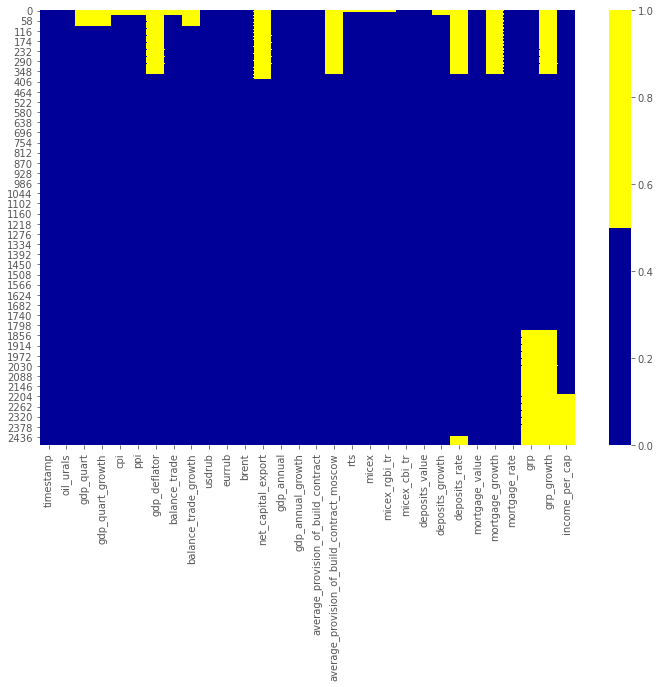

In [7]:
cols = df.columns[:30] # primeras 30 columnas
colours = ['#000099', '#ffff00'] # especificar colores - amarillo es un dato perdido. azul no.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [9]:
## con una librería
!pip install missingno

In [10]:
import missingno as msno


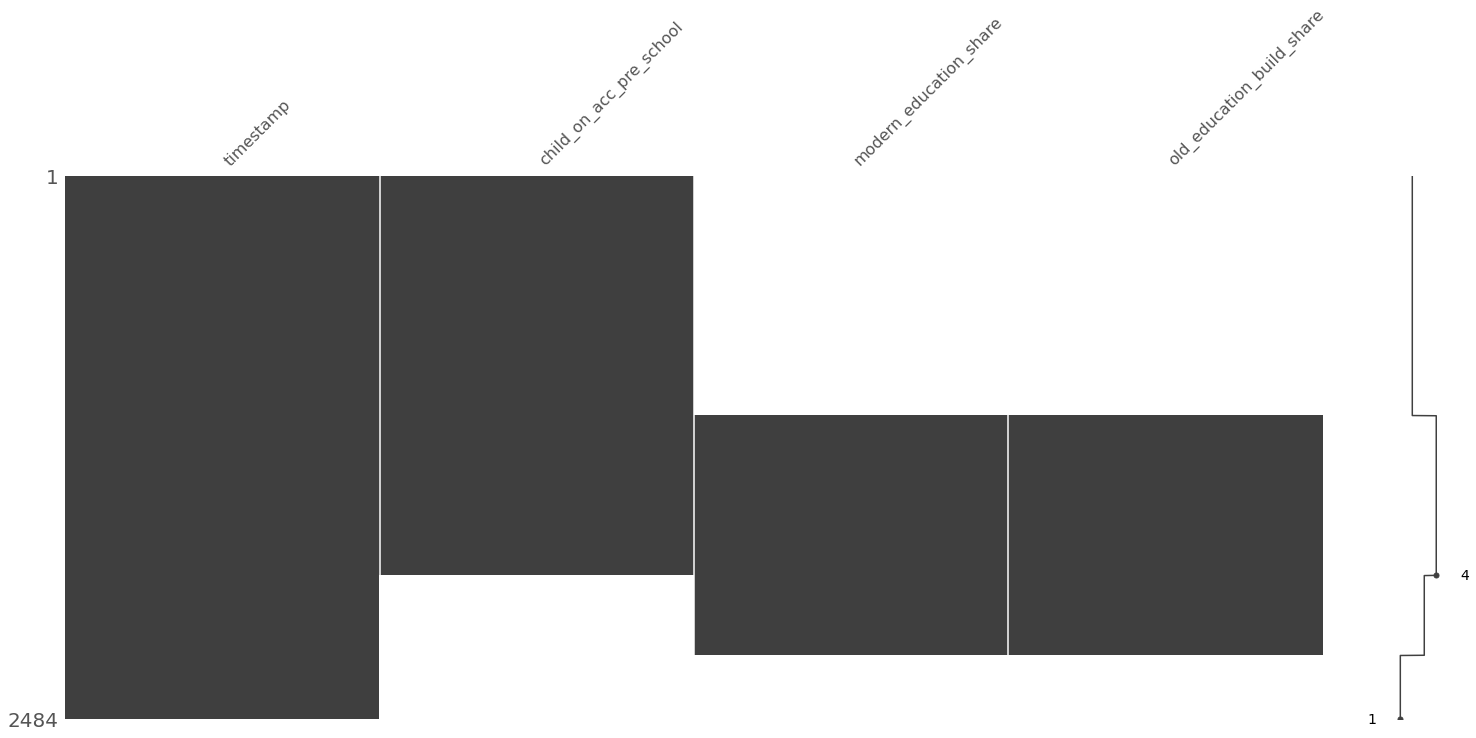

In [29]:
msno.matrix(df.loc[:,['timestamp', 'child_on_acc_pre_school', 'modern_education_share','old_education_build_share']])

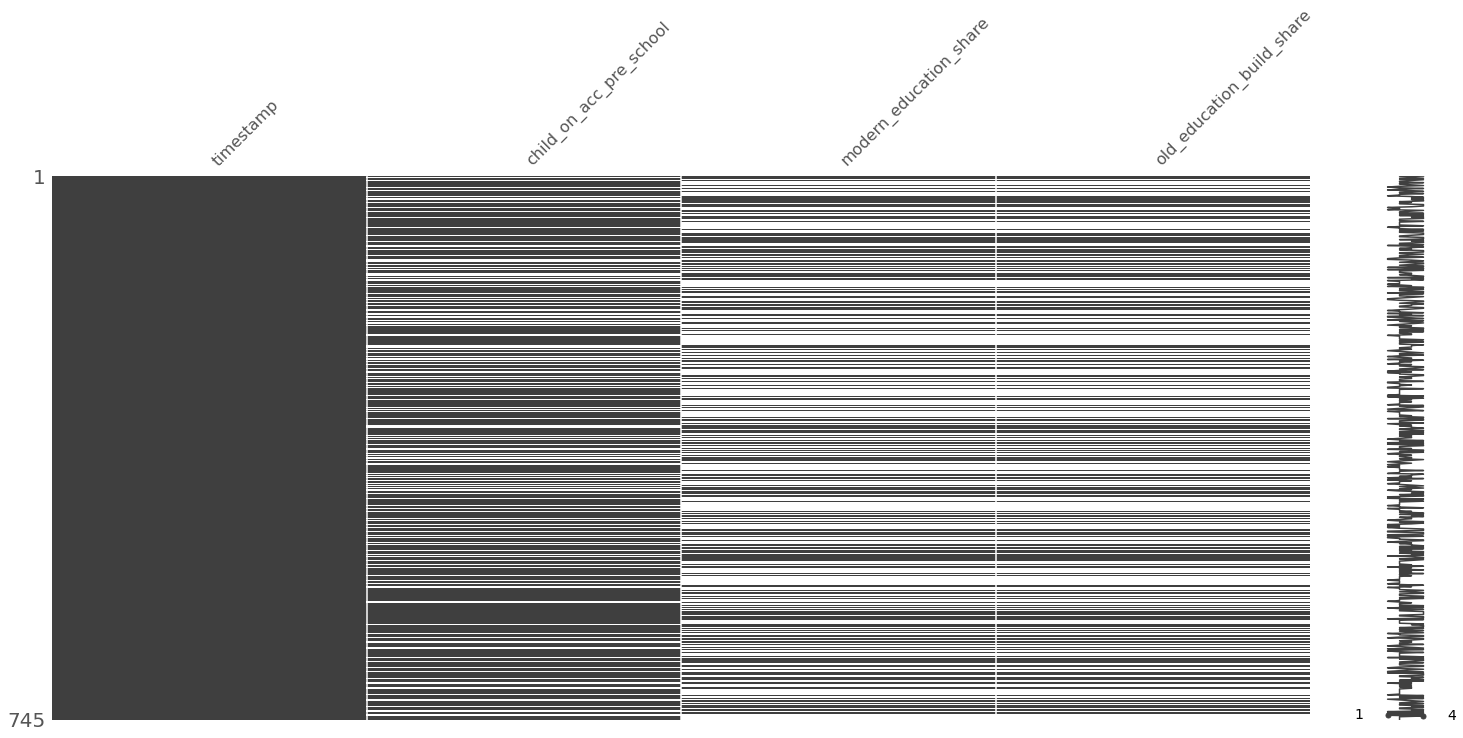

In [30]:
# Tomar un subset del 30% de la muestra
msno.matrix(df.loc[:,['timestamp', 'child_on_acc_pre_school', 'modern_education_share','old_education_build_share']].sample(frac=0.3))

Técnica 2: Obtener porcentaje de datos perdidos



In [31]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

timestamp - 0.0%
oil_urals - 0.0%
gdp_quart - 4.0%
gdp_quart_growth - 4.0%
cpi - 1.0%
ppi - 1.0%
gdp_deflator - 15.0%
balance_trade - 1.0%
balance_trade_growth - 4.0%
usdrub - 0.0%
eurrub - 0.0%
brent - 0.0%
net_capital_export - 16.0%
gdp_annual - 0.0%
gdp_annual_growth - 0.0%
average_provision_of_build_contract - 0.0%
average_provision_of_build_contract_moscow - 15.0%
rts - 0.0%
micex - 0.0%
micex_rgbi_tr - 0.0%
micex_cbi_tr - 0.0%
deposits_value - 0.0%
deposits_growth - 1.0%
deposits_rate - 17.0%
mortgage_value - 0.0%
mortgage_growth - 15.0%
mortgage_rate - 0.0%
grp - 26.0%
grp_growth - 41.0%
income_per_cap - 12.0%
real_dispos_income_per_cap_growth - 26.0%
salary - 12.0%
salary_growth - 26.0%
fixed_basket - 0.0%
retail_trade_turnover - 12.0%
retail_trade_turnover_per_cap - 12.0%
retail_trade_turnover_growth - 12.0%
labor_force - 12.0%
unemployment - 12.0%
employment - 12.0%
invest_fixed_capital_per_cap - 12.0%
invest_fixed_assets - 12.0%
profitable_enterpr_share - 26.0%
unprofitable_

## Actividad

Eliminar todas las columnas de datos que presenten un porcentaje de datos perdidos sobre un 20% del total de la muestra



# 2. Datos anómalos

Son aquellos datos que *son muy distintos* con respecto al comportamiento *normal* de los demás datos.


¿Cómo detectarlos?

Técnica 1: Histogramas/Boxplots

Aplica sólo si el dato es numérico


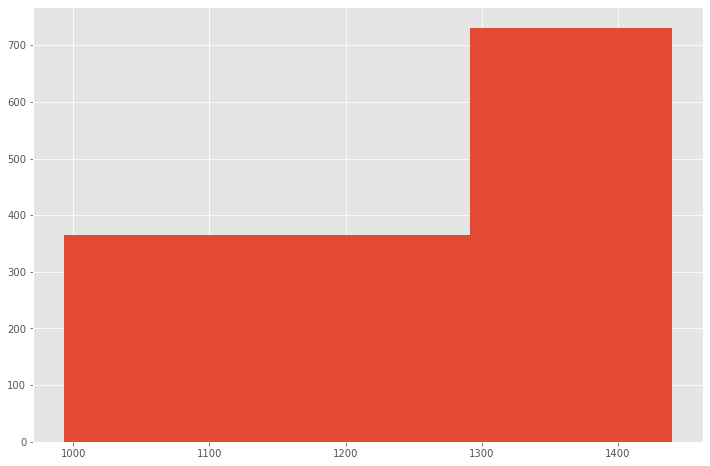

In [56]:
df['museum_visitis_per_100_cap'].hist(bins=3)

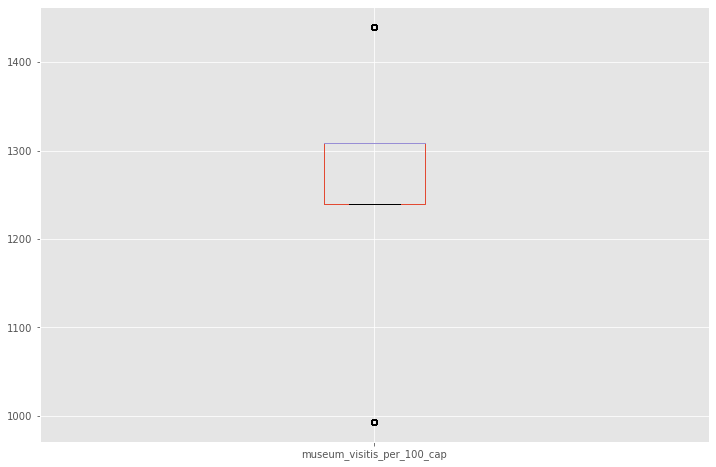

In [39]:
df.boxplot(column=['museum_visitis_per_100_cap'])

Técnica 2: Estadísitcas descriptivas



In [40]:
df['museum_visitis_per_100_cap'].describe()

count    1461.000000
mean     1245.543463
std       162.526951
min       993.000000
25%      1240.000000
50%      1309.000000
75%      1309.000000
max      1440.000000
Name: museum_visitis_per_100_cap, dtype: float64

Técnica 3: Bar Chart

Cuando el tipo de dato es categórico



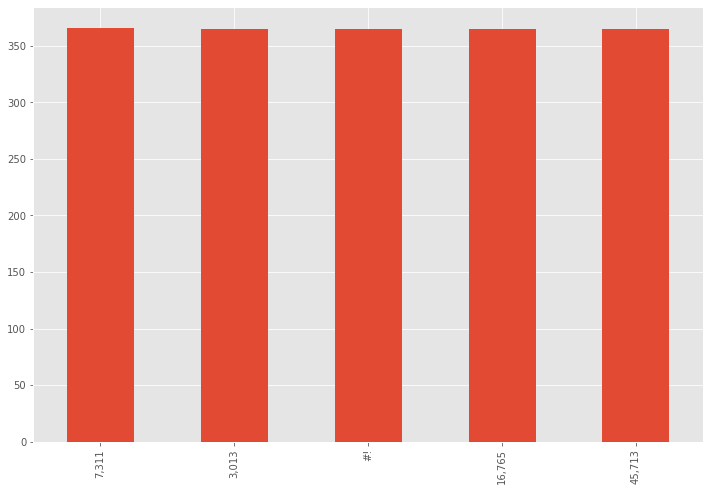

In [46]:
df['child_on_acc_pre_school'].value_counts().plot.bar()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 100 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   timestamp                                   2484 non-null   object 
 1   oil_urals                                   2484 non-null   float64
 2   gdp_quart                                   2394 non-null   float64
 3   gdp_quart_growth                            2394 non-null   float64
 4   cpi                                         2453 non-null   float64
 5   ppi                                         2453 non-null   float64
 6   gdp_deflator                                2119 non-null   float64
 7   balance_trade                               2453 non-null   float64
 8   balance_trade_growth                        2394 non-null   float64
 9   usdrub                                      2481 non-null   float64
 10  eurrub     

# Actividad

Identificar los datos Outliers para las columnas: 

* rent_price_4+room_bus
* rent_price_3room_bus
* rent_price_2room_bus
* rent_price_1room_bus
* rent_price_3room_eco
* rent_price_2room_eco
* rent_price_1room_eco